# 1.2.4.2 Feature Definition & Exploration Plan

This notebook defines the feature engineering strategy and exploratory data analysis (EDA) plan for the AB Data Challenge project.

## Objectives
- Define comprehensive feature families for anomaly detection
- Create detailed EDA plan for Iteration 2
- Establish data cleaning rules and preprocessing requirements
- Plan feature engineering approach for model development


## Feature Families for Anomaly Detection

### 1. Temporal Window Features
These features capture consumption patterns over different time windows:

#### Short-term Windows (1-24 hours)
- **Rolling Mean**: 1h, 3h, 6h, 12h, 24h rolling averages
- **Rolling Std**: 1h, 3h, 6h, 12h, 24h rolling standard deviations
- **Rolling Min/Max**: 1h, 3h, 6h, 12h, 24h rolling minimums and maximums
- **Rolling Percentiles**: 25th, 50th, 75th, 90th, 95th percentiles over 24h window

#### Medium-term Windows (1-7 days)
- **Daily Aggregates**: Mean, median, std, min, max consumption per day
- **Daily Patterns**: Hourly consumption patterns within each day
- **Weekend vs Weekday**: Different patterns for weekend vs weekday consumption
- **Rolling 7-day**: 7-day rolling statistics for trend analysis

#### Long-term Windows (1-12 months)
- **Weekly Aggregates**: Mean, median, std consumption per week
- **Monthly Aggregates**: Mean, median, std consumption per month
- **Seasonal Patterns**: Quarterly and seasonal consumption trends
- **Year-over-Year**: Comparison with same period previous year

### 2. Baseline Features
These features establish normal consumption patterns:

#### Municipality-specific Baselines
- **Historical Mean**: Long-term average consumption per municipality
- **Historical Median**: Long-term median consumption per municipality
- **Historical Std**: Long-term standard deviation per municipality
- **Percentile Baselines**: 25th, 50th, 75th, 90th, 95th percentiles

#### Time-based Baselines
- **Hourly Baseline**: Average consumption for each hour of day
- **Daily Baseline**: Average consumption for each day of week
- **Monthly Baseline**: Average consumption for each month of year
- **Seasonal Baseline**: Average consumption for each season

### 3. Variability Features
These features measure consumption variability and stability:

#### Statistical Variability
- **Coefficient of Variation**: Std/Mean ratio for different time windows
- **Range**: Max - Min consumption over time windows
- **Interquartile Range**: 75th - 25th percentile range
- **Skewness**: Distribution asymmetry measure
- **Kurtosis**: Distribution tail heaviness measure

#### Stability Measures
- **Consumption Stability**: Variance in consumption over time
- **Pattern Consistency**: Consistency of daily/weekly patterns
- **Trend Stability**: Stability of consumption trends
- **Volatility**: Rate of change in consumption

### 4. Seasonality Features
These features capture seasonal and cyclical patterns:

#### Cyclical Components
- **Hour of Day**: Cyclical encoding of hour (sin/cos)
- **Day of Week**: Cyclical encoding of weekday (sin/cos)
- **Day of Month**: Cyclical encoding of day in month
- **Month of Year**: Cyclical encoding of month (sin/cos)
- **Day of Year**: Cyclical encoding of day in year

#### Seasonal Indicators
- **Season**: Spring, Summer, Fall, Winter indicators
- **Quarter**: Q1, Q2, Q3, Q4 indicators
- **Holiday Periods**: Special holiday and vacation periods
- **Weather Season**: Hot/Cold weather periods

### 5. Aggregate Features
These features combine multiple data points:

#### Time-based Aggregates
- **Daily Totals**: Total consumption per day
- **Weekly Totals**: Total consumption per week
- **Monthly Totals**: Total consumption per month
- **Peak Consumption**: Maximum consumption in time windows
- **Off-peak Consumption**: Minimum consumption in time windows

#### Statistical Aggregates
- **Moving Averages**: Different window sizes for trend analysis
- **Exponential Smoothing**: Weighted averages with decay
- **Cumulative Sums**: Running totals over time
- **Growth Rates**: Period-over-period growth rates

### 6. Data Quality Features
These features help identify data quality issues:

#### Completeness Features
- **Missing Value Count**: Number of missing values in time windows
- **Missing Value Rate**: Percentage of missing values
- **Data Availability**: Percentage of available data points
- **Gap Length**: Length of consecutive missing value periods

#### Consistency Features
- **Value Consistency**: Consistency of values within time windows
- **Pattern Consistency**: Consistency of consumption patterns
- **Timestamp Consistency**: Consistency of timestamp intervals
- **Range Consistency**: Consistency of value ranges

#### Anomaly Indicators
- **Negative Value Count**: Number of negative consumption values
- **Zero Value Count**: Number of zero consumption values
- **Extreme Value Count**: Number of extreme consumption values
- **Outlier Indicators**: Statistical outlier detection flags


## EDA Plan for Iteration 2

### 1. Data Coverage Analysis
- **Temporal Coverage**: Analyze data availability across time periods
- **Municipality Coverage**: Assess data completeness by municipality
- **Seasonal Coverage**: Evaluate data availability across seasons
- **Gap Analysis**: Identify and quantify data gaps and missing periods

### 2. Distribution Analysis
- **Consumption Distributions**: Analyze consumption value distributions by municipality
- **Temporal Distributions**: Examine consumption patterns across different time periods
- **Outlier Analysis**: Identify and analyze extreme consumption values
- **Normality Tests**: Assess distribution normality and transformation needs

### 3. Stability Analysis
- **Trend Analysis**: Identify long-term consumption trends
- **Seasonality Analysis**: Detect seasonal patterns and cycles
- **Volatility Analysis**: Measure consumption volatility over time
- **Pattern Consistency**: Assess consistency of consumption patterns

### 4. Correlation Analysis
- **Feature Correlations**: Analyze correlations between different features
- **Temporal Correlations**: Examine autocorrelations and lag relationships
- **Cross-Municipality Correlations**: Identify correlations between municipalities
- **External Factor Correlations**: Explore correlations with external factors

### 5. Anomaly Pattern Analysis
- **Anomaly Frequency**: Analyze frequency and patterns of anomalies
- **Anomaly Clustering**: Identify clusters and patterns in anomalous data
- **Anomaly Severity**: Categorize anomalies by severity and impact
- **Anomaly Context**: Analyze context and conditions surrounding anomalies

### 6. Feature Engineering Validation
- **Feature Importance**: Assess importance of different feature families
- **Feature Stability**: Evaluate stability of engineered features
- **Feature Interactions**: Identify important feature interactions
- **Feature Redundancy**: Detect and address redundant features


# Feature Families for Anomaly Detection

In this section, we outline feature families derived from hourly water consumption data (`CONSUMO_REAL`) for each supply contract (`POLIZA_SUMINISTRO`). These features are designed to support anomaly detection by capturing consumption patterns, variability, and temporal context based on timestamp (`FECHA_HORA`) and observed behavior.

---

## 1. Temporal Window Features

These features summarize short-term consumption behavior by analyzing usage patterns over recent hours.

- **Recent Hourly Consumption**  
  Previous hour’s `CONSUMO_REAL` value to detect immediate changes in usage.

- **Short-Term Moving Aggregates**  
  Rolling averages and sums over windows like 6h, 12h, or 24h using `CONSUMO_REAL` to smooth out fluctuations.

- **Rate of Change (Δ)**  
  Difference or percent change between the current and previous hour's usage to capture spikes or drops.

- **Zero-Usage Streaks**  
  Count of consecutive hours with `CONSUMO_REAL = 0`, useful for detecting outages or inactivity.

---

## 2. Baseline Features

These features establish normal behavior for each meter and highlight deviations.

- **Hourly Baseline**  
  Mean usage at each hour of the day for each meter (e.g., average `CONSUMO_REAL` at 08:00).

- **Day-of-Week Baseline**  
  Average daily usage for each weekday to distinguish between weekday and weekend patterns.

- **Same-Time Last Week**  
  Compares current reading with the reading exactly one week ago.

- **Long-Term Mean / Z-Score**  
  Overall mean and standard deviation for each meter; used to compute normalized deviations.

---

## 3. Time-of-Day and Seasonal Features

These features capture periodic and seasonal consumption context.

- **Hour of Day**  
  Integer feature (0–23) extracted from `FECHA_HORA` to model daily cycles.

- **Day of Week**  
  Day name or number (0 = Monday) to represent weekly periodicity.

- **Month or Season**  
  Month number (1–12) or categorical season (e.g., Summer, Winter) derived from `FECHA_HORA`.

---


## 4. Notes on Anomaly Labels

The dataset includes `CODI_ANOMALIA`, `DATA_INICI`, and `DATA_FI` fields indicating known anomaly periods. These are **not used as input features** but can be leveraged for validation or supervised learning setup.

All derived features are computed per meter over time, ensuring that anomaly detection models are tailored to individual usage behavior.


Loading dataset from ../data/dataset_sample.csv...
✓ Successfully loaded data: 25,977 rows, 7 columns.
✓ FECHA_HORA column parsed to datetime successfully.
Total missing CONSUMO_REAL values: 4449 (17.1%)
Total zero CONSUMO_REAL values: 17766 (68.4%)


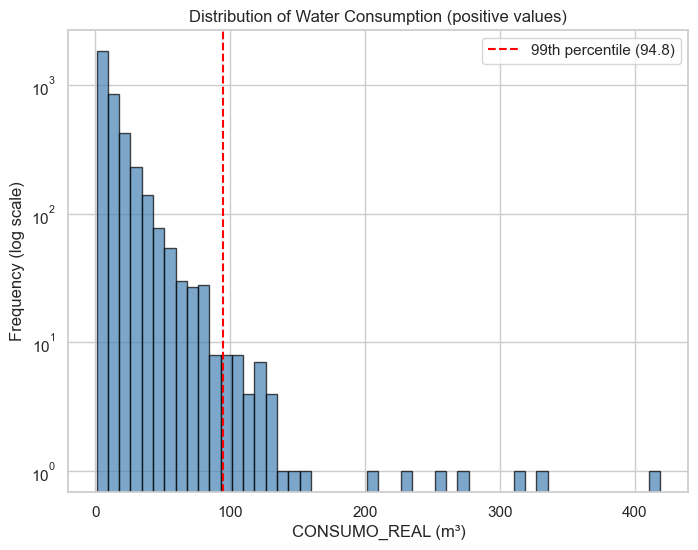

✓ Plotted enhanced distribution of CONSUMO_REAL.
Selected contract for time series plot: JSM5YS4KVQUI5DQA


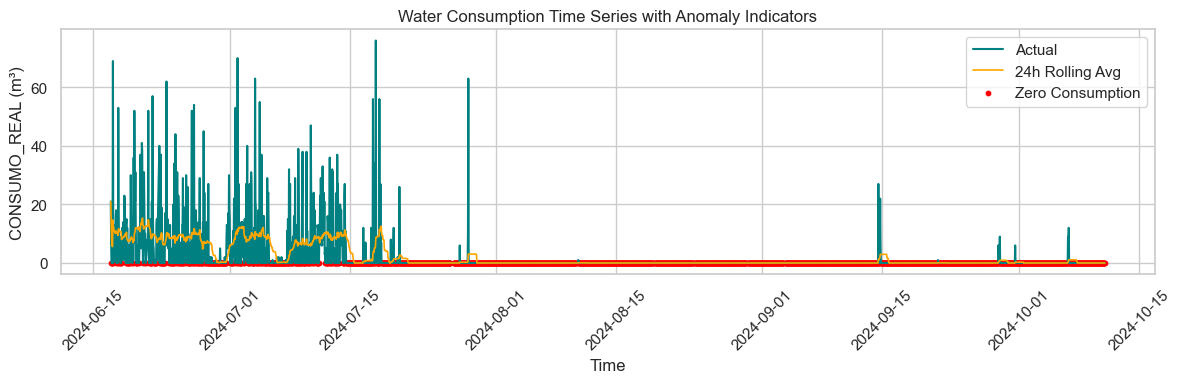

✓ Plotted enhanced time series with anomaly indicators.


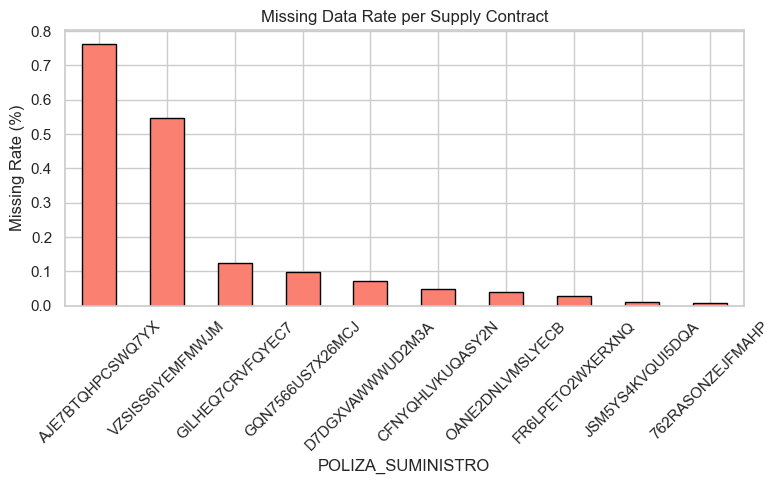

✓ Plotted missing rate per contract.


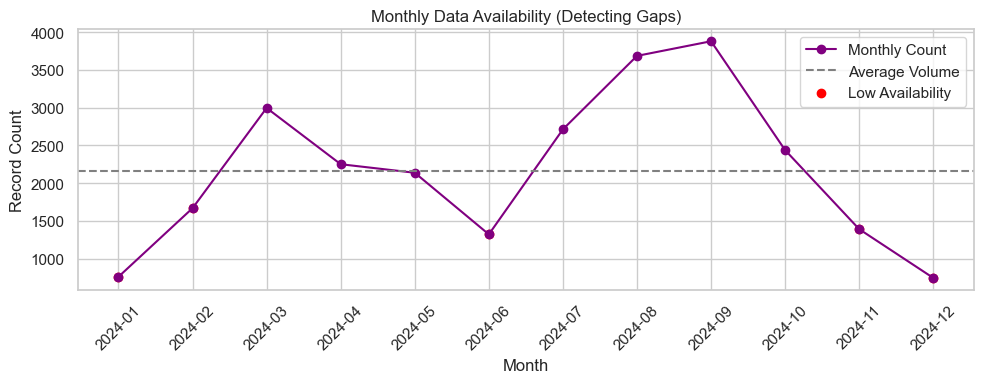

✓ Plotted data availability over time.


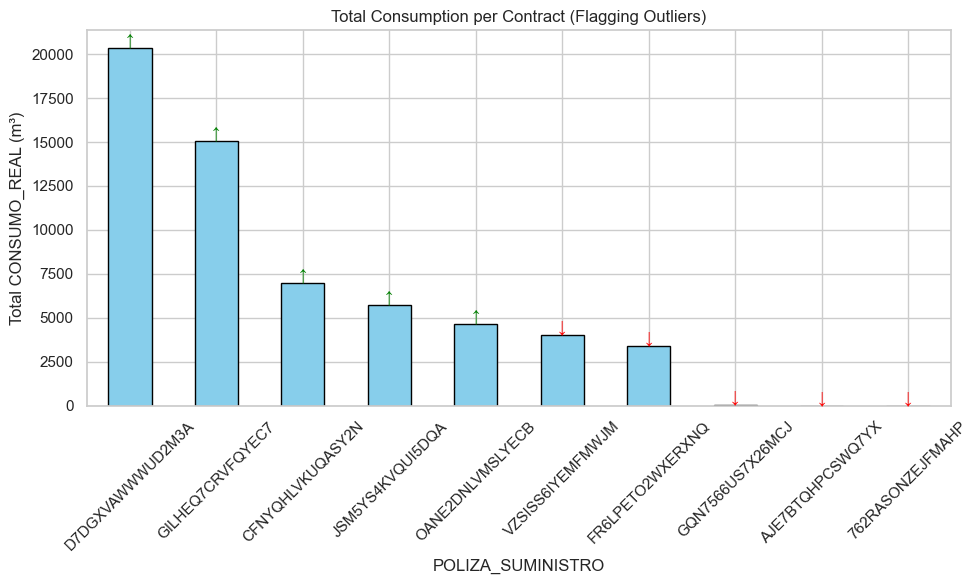

✓ Plotted total consumption with outlier highlights.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# 1. Data Loading and Preparation
data_path = '../data/dataset_sample.csv'
try:
    print(f"Loading dataset from {data_path}...")
    df = pd.read_csv(data_path)
    print(f"✓ Successfully loaded data: {len(df):,} rows, {len(df.columns)} columns.")

    if 'FECHA_HORA' in df.columns:
        df['FECHA_HORA'] = pd.to_datetime(df['FECHA_HORA'], errors='coerce')
        if df['FECHA_HORA'].isnull().any():
            num_invalid = df['FECHA_HORA'].isnull().sum()
            print(f"⚠ Warning: {num_invalid} timestamps could not be parsed and were set as NaT.")
        else:
            print("✓ FECHA_HORA column parsed to datetime successfully.")
    else:
        raise KeyError("FECHA_HORA column is missing")

    if 'CONSUMO_REAL' not in df.columns:
        raise KeyError("CONSUMO_REAL column is missing")

    df['CONSUMO_REAL'] = pd.to_numeric(df['CONSUMO_REAL'], errors='coerce')

    negative_count = (df['CONSUMO_REAL'] < 0).sum()
    if negative_count > 0:
        print(f"⚠ Warning: {negative_count} negative CONSUMO_REAL values found. Treating them as missing.")
        df.loc[df['CONSUMO_REAL'] < 0, 'CONSUMO_REAL'] = np.nan

    total_missing = df['CONSUMO_REAL'].isna().sum()
    print(f"Total missing CONSUMO_REAL values: {total_missing} ({total_missing/len(df)*100:.1f}%)")
    total_zero = (df['CONSUMO_REAL'] == 0).sum()
    print(f"Total zero CONSUMO_REAL values: {total_zero} ({total_zero/len(df)*100:.1f}%)")
except Exception as e:
    print(f"⚠ Failed to load dataset: {e}")
    raise

# 2. Enhanced Histogram with Outlier Threshold
consumption_values = df['CONSUMO_REAL'].dropna()
has_positives = (consumption_values > 0).any()
if has_positives:
    consumption_pos = consumption_values[consumption_values > 0]
    high_threshold = consumption_pos.quantile(0.99)

    plt.figure(figsize=(8, 6))
    plt.hist(consumption_pos, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    plt.axvline(high_threshold, color='red', linestyle='--', label=f'99th percentile ({high_threshold:.1f})')
    plt.yscale('log')
    plt.title('Distribution of Water Consumption (positive values)')
    plt.xlabel('CONSUMO_REAL (m³)')
    plt.ylabel('Frequency (log scale)')
    plt.legend()
    plt.show()
    print("✓ Plotted enhanced distribution of CONSUMO_REAL.")
else:
    print("No positive consumption values to plot distribution.")

# 3. Time Series Plot with Anomaly Highlights
if 'FECHA_HORA' in df.columns and 'CONSUMO_REAL' in df.columns:
    if 'POLIZA_SUMINISTRO' in df.columns:
        policy_groups = df.groupby('POLIZA_SUMINISTRO')
        total_per_policy = policy_groups['CONSUMO_REAL'].count() + policy_groups['CONSUMO_REAL'].apply(lambda x: x.isna().sum())
        missing_per_policy = policy_groups['CONSUMO_REAL'].apply(lambda x: x.isna().sum())
        consumption_sum = policy_groups['CONSUMO_REAL'].sum()
        valid_policies = consumption_sum[consumption_sum > 0].index
        if len(valid_policies) == 0:
            selected_policy = df['POLIZA_SUMINISTRO'].iloc[0]
        else:
            missing_ratio = missing_per_policy[valid_policies] / total_per_policy[valid_policies]
            selected_policy = missing_ratio.idxmin()
        print(f"Selected contract for time series plot: {selected_policy}")
        data_sample = df[df['POLIZA_SUMINISTRO'] == selected_policy].copy()
    else:
        data_sample = df.copy()

    data_sample.sort_values('FECHA_HORA', inplace=True)
    data_sample = data_sample.dropna(subset=['CONSUMO_REAL'])
    if len(data_sample) > 0:
        data_sample['rolling_24h'] = data_sample['CONSUMO_REAL'].rolling(window=24, min_periods=1).mean()

        plt.figure(figsize=(12, 4))
        plt.plot(data_sample['FECHA_HORA'], data_sample['CONSUMO_REAL'], color='teal', label='Actual')
        plt.plot(data_sample['FECHA_HORA'], data_sample['rolling_24h'], color='orange', label='24h Rolling Avg', linewidth=1.2)

        zero_periods = data_sample[data_sample['CONSUMO_REAL'] == 0]
        plt.scatter(zero_periods['FECHA_HORA'], zero_periods['CONSUMO_REAL'], color='red', s=10, label='Zero Consumption')

        plt.title('Water Consumption Time Series with Anomaly Indicators')
        plt.xlabel('Time')
        plt.ylabel('CONSUMO_REAL (m³)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print("✓ Plotted enhanced time series with anomaly indicators.")
    else:
        print("No data available to plot time series.")
else:
    print("FECHA_HORA or CONSUMO_REAL column missing, skipping time series plot.")

# 4. Missing Values Rate per Supply Contract
if 'POLIZA_SUMINISTRO' in df.columns:
    missing_by_policy = df.groupby('POLIZA_SUMINISTRO')['CONSUMO_REAL'].apply(lambda x: x.isna().sum())
    policy_counts = df['POLIZA_SUMINISTRO'].value_counts()
    missing_rate = (missing_by_policy / policy_counts[missing_by_policy.index]).fillna(0)

    plt.figure(figsize=(8, 5))
    missing_rate.sort_values(ascending=False).plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Missing Data Rate per Supply Contract')
    plt.xlabel('POLIZA_SUMINISTRO')
    plt.ylabel('Missing Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("✓ Plotted missing rate per contract.")
else:
    if total_missing > 0:
        plt.figure(figsize=(4, 5))
        plt.bar(['CONSUMO_REAL'], [total_missing], color='salmon', edgecolor='black')
        plt.title('Missing Values in CONSUMO_REAL')
        plt.ylabel('Missing Values Count')
        plt.show()
        print("✓ Plotted overall missing values count.")
    else:
        print("No missing values to plot.")

# 5. Monthly Data Availability with Low-Volume Flags
if 'FECHA_HORA' in df.columns:
    df['YearMonth'] = df['FECHA_HORA'].dt.to_period('M')
    monthly_counts = df.groupby('YearMonth').size().sort_index()
    months = [period.strftime('%Y-%m') for period in monthly_counts.index]
    counts = monthly_counts.values
    mean_count = np.mean(counts)
    low_mask = counts < mean_count * 0.8

    plt.figure(figsize=(10, 4))
    plt.plot(months, counts, marker='o', color='purple', label='Monthly Count')
    plt.axhline(mean_count, color='gray', linestyle='--', label='Average Volume')
    plt.scatter(np.array(months)[low_mask], np.array(counts)[low_mask], color='red', label='Low Availability')
    plt.title('Monthly Data Availability (Detecting Gaps)')
    plt.xlabel('Month')
    plt.ylabel('Record Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("✓ Plotted data availability over time.")
else:
    print("FECHA_HORA column missing, cannot plot data availability over time.")

# 6. Total Consumption per Contract (Corrected Annotations)
if 'POLIZA_SUMINISTRO' in df.columns and 'CONSUMO_REAL' in df.columns:
    total_consumption = df.groupby('POLIZA_SUMINISTRO')['CONSUMO_REAL'].sum(min_count=1).fillna(0)
    total_consumption = total_consumption.sort_values(ascending=False)
    top5 = total_consumption.head(5)
    bottom5 = total_consumption.tail(5)

    plt.figure(figsize=(10, 6))
    ax = total_consumption.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Total Consumption per Contract (Flagging Outliers)')
    plt.xlabel('POLIZA_SUMINISTRO')
    plt.ylabel('Total CONSUMO_REAL (m³)')
    plt.xticks(rotation=45)

    # Safe annotation using integer bar index
    for i, idx in enumerate(total_consumption.index):
        if idx in top5.index:
            ax.text(i, total_consumption[idx], '↑', color='green', ha='center', va='bottom')
        elif idx in bottom5.index:
            ax.text(i, total_consumption[idx], '↓', color='red', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    print("✓ Plotted total consumption with outlier highlights.")
